# Pricing : excess of rain cover

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import xarray as xr
from numpy.testing import assert_allclose
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

# Context

A client is looking to be covered against excess of rain.

You will first manipulate rasters and then use historical data to understand the risk.

# 1. Parameters

In [2]:
DATA_PATH = Path("data")
RASTERS_PATH = DATA_PATH / "rasters"

# 2. Data

## 2.1 Load data

In [3]:
vegetation_path = RASTERS_PATH / "vegetation.nc"
precipitation_path = RASTERS_PATH / "precipitation.nc"

In [4]:
vegetation_xr = xr.load_dataset(vegetation_path)
precipitation_xr = xr.load_dataset(precipitation_path)

## 2.2 Visualize data

Let's look at the coordinates values:

In [5]:
print(vegetation_xr.latitude.values[:2])

[-4755784.4062485 -4756034.4062485]


The coordinate reference system (crs) here is named an equal-area crs which means that the areas are preserved when projecting the earth to a plane. The unit of the coordinates is **meters**. See more info [there](https://en.wikipedia.org/wiki/Spatial_reference_system).

In [6]:
precipitation_xr

<xarray.Dataset> Size: 244MB
Dimensions:        (longitude: 48, latitude: 48, time: 26433)
Coordinates:
    spatial_ref    int64 8B 0
  * longitude      (longitude) float64 384B 1.275e+06 1.276e+06 ... 1.28e+06
  * latitude       (latitude) float64 384B -4.756e+06 -4.756e+06 ... -4.76e+06
  * time           (time) datetime64[ns] 211kB 1950-01-01 ... 2022-05-15
Data variables:
    precipitation  (latitude, longitude, time) float32 244MB 0.0 0.0 ... 0.0 0.0

One can notice that the precipitation raster has time variable. We then have access of cumulative daily precipitation data since the 1st of January 1950

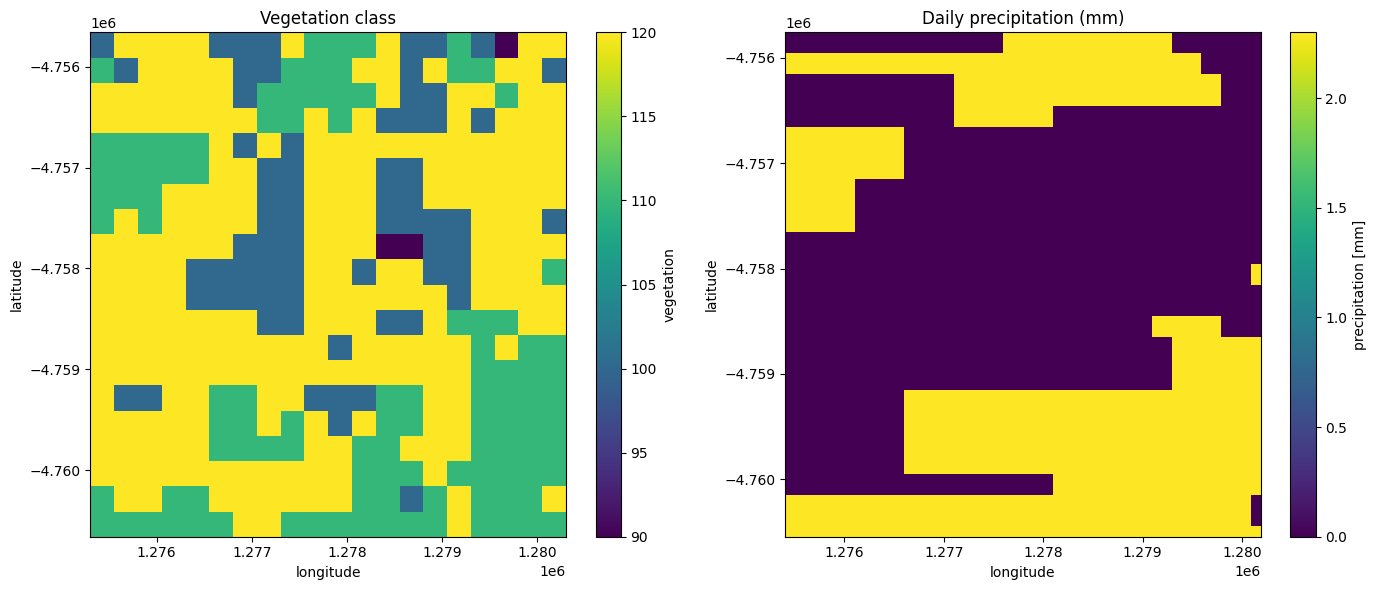

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
vegetation_xr.vegetation.plot(ax=ax[0])
ax[0].set_title("Vegetation class")
precipitation_xr.precipitation[dict(time=3)].plot(ax=ax[1])
ax[1].set_title("Daily precipitation (mm)")
ax[1].set_xlabel("longitude")
ax[1].set_ylabel("latitude")
plt.tight_layout()
plt.show()

The vegetation raster is a gridded array of categorical values with information on the type of the dominant vegetation of each pixel.

    - Class 90 : Water and urban areas
    - Class 100: Herbaceous class
    - Class 110: Forest class
    - Class 120: Shrubland class
    
For example, the pixel at location (longitude 1277929.24, latitude -4758284.41) displays a value of 120, meaning that the vegetation at this location is shrubland.

#### What is each raster's resolution (in meters)?

The resolution is defined as the distance between the centres of 2 neighbour pixels.

In [15]:
# NOTE: fill me!
"""
Created on Tue Aug 13 18:29:21 2024
@author: harishgunasekaran
"""
# here the unit of raster's resolution of question is in meters. 
# meaning, the question asked is regarding the spatial resolution and not the time resoultion. 

##  for vegetation
#get the size of array
vegetSize = np.shape(vegetation_xr.vegetation)[0]

# initialize the dummy array with NaN
# aims to store the difference between neighboring pixels
longi_resol_all  = np.ones(vegetSize-1)*np.nan
lati_resol_all  = np.ones(vegetSize-1)*np.nan
for i in np.arange(1,vegetSize):
    diff_longi = vegetation_xr.vegetation['longitude'][i].values - vegetation_xr.vegetation['longitude'][i-1].values
    diff_lati = vegetation_xr.vegetation['latitude'][i].values - vegetation_xr.vegetation['latitude'][i-1].values
    # check/visualize if the difference is same or not by printing them
    if i==1:
        print('visualizing if the difference is same or not')
    print(diff_longi, diff_lati)
    # store all the abs difference in the array 
    longi_resol_all[i-1] = np.abs(diff_longi.copy())
    lati_resol_all[i-1] = np.abs(diff_lati.copy())

    
# take the mean of difference      
avg_resol_longi = np.mean(longi_resol_all)
avg_resol_lati = np.mean(lati_resol_all)

print('\nlongitude resolution = %s meters' % avg_resol_longi)
print('\nlatitude resolution = %s meters' % avg_resol_lati)

vegetation_res = int(np.mean([avg_resol_longi, avg_resol_lati]))
print('\nvegitation resolution = %s meters\n' % vegetation_res)

## repeat the same for precipitation
#get the size of array
precipSize = np.shape(precipitation_xr.precipitation)[0]

# initialize the dummy array with NaN
# aims to store the difference between neighboring pixels
longi_resol_all  = np.ones(precipSize-1)*np.nan
lati_resol_all  = np.ones(precipSize-1)*np.nan
for i in np.arange(1,precipSize):
    diff_longi = precipitation_xr.precipitation['longitude'][i].values - precipitation_xr.precipitation['longitude'][i-1].values
    diff_lati = precipitation_xr.precipitation['latitude'][i].values - precipitation_xr.precipitation['latitude'][i-1].values
    # check/visualize if the difference is same or not by printing them
    if i==1:
        print('visualizing if the difference is same or not')
    print(diff_longi, diff_lati)
    # store all the abs difference in the array 
    longi_resol_all[i-1] = np.abs(diff_longi.copy())
    lati_resol_all[i-1] = np.abs(diff_lati.copy())
    
# take the mean of difference      
avg_resol_longi = np.mean(longi_resol_all)
avg_resol_lati = np.mean(lati_resol_all)

print('\nlongitude resolution = %s meters' % avg_resol_longi)
print('\nlatitude resolution = %s meters' % avg_resol_lati)


precipitation_res = int(np.mean([avg_resol_longi, avg_resol_lati]))
print('\nprecipitation resolution = %s meters' % precipitation_res)


vegetation_resolution = vegetation_res 
precipitation_resolution = precipitation_res

visualizing if the difference is same or not
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0
250.0 -250.0

longitude resolution = 250.0 meters

latitude resolution = 250.0 meters

vegitation resolution = 250 meters

visualizing if the difference is same or not
99.69939879747108 -99.69939879793674
99.6993987977039 -99.69939879700541
99.69939879747108 -99.69939879793674
99.6993987977039 -99.69939879700541
99.69939879747108 -99.69939879793674
99.6993987977039 -99.69939879793674
99.6993987977039 -99.69939879700541
99.69939879747108 -99.69939879793674
99.6993987977039 -99.69939879793674
99.69939879747108 -99.69939879700541
99.6993987977039 -99.69939879793674
99.69939879747108 -99.69939879793674
99.6993987977039 -99.69939879700541
99.69939879747108 -99.69939879793674
99.6993987977039 -99.69939879700541
99.699

In [24]:
## EXTRA STEPS FOR CURIOSITY
## Finding time resoultion of precipitation in the similar way as above
precipResolSize = np.shape(precipitation_xr.precipitation)[2]
time_resol_all  = np.ones(precipResolSize-1)*np.nan
for i in np.arange(1,precipResolSize):
    diff_time = precipitation_xr.precipitation['time'][i].values - precipitation_xr.precipitation['time'][i-1].values
    time_resol_all[i-1] = diff_time.copy()
    # print(diff_time)

avg_resol_time = np.mean(time_resol_all)
#% unit conversions
avg_resol_time_sec = avg_resol_time * 1e-9
avg_resol_time_day = avg_resol_time_sec/(60*60*24)
print('\ntime resolution in ns = ', avg_resol_time)
print('\ntime resolution in s = ', avg_resol_time_sec)
print('\ntime resolution in day = ', avg_resol_time_day)



time resolution in ns =  86400000000000.0

time resolution in s =  86400.0

time resolution in day =  1.0


In [16]:
assert isinstance(vegetation_resolution, int)
assert isinstance(precipitation_resolution, int)

# 3. Manipulate rasters

### 3.1 Change rasters' resolution

Your task is to get the precipitation for all grid cells in the forest class (value of 110). Unfortunately, the 2 rasters do not have the same resolution. Your task will be to reindex the 2 rasters at the **same** resolution.

The resolution of each raster should be the finest one out of the 2 intial datasets.

To downscale (move from coarse to finer resolution), you will use the function `xarray.interp()`: https://docs.xarray.dev/en/stable/generated/xarray.DataArray.interp.html

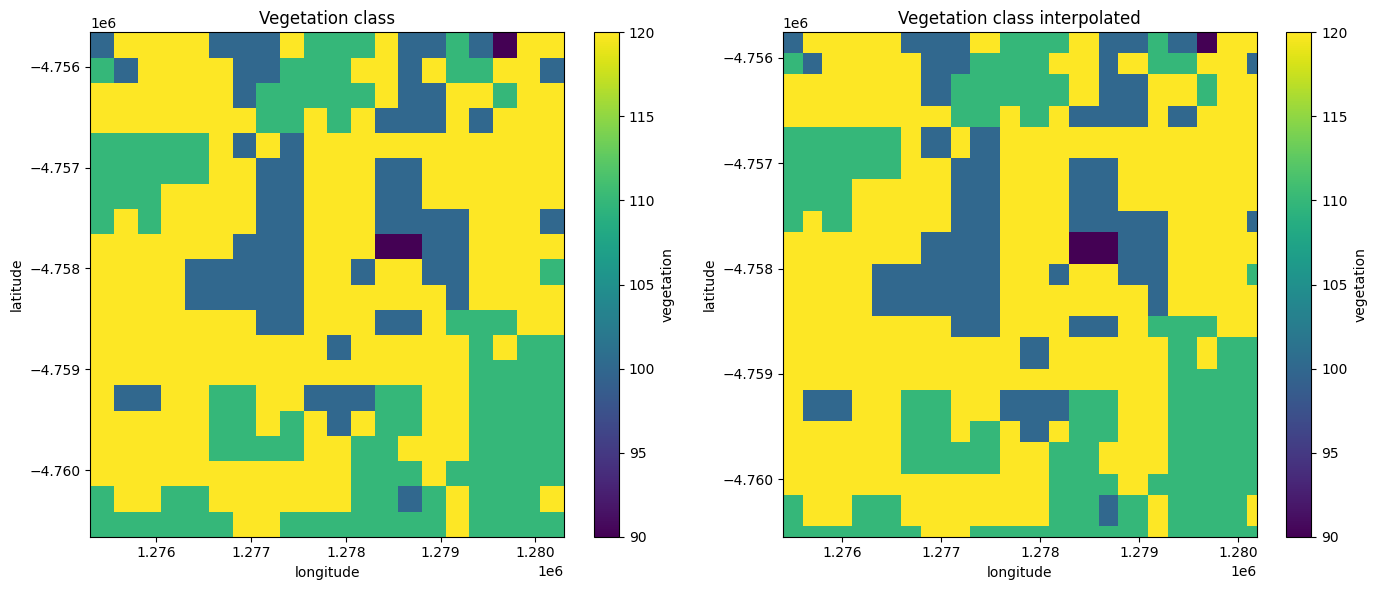

In [21]:
# NOTE: fill me!

"""
Created on Sat Aug 21 11:18:21 2024
@author: harishgunasekaran
"""
## from the above test on resoultion we found that, 
## precipitation resolution is finer (99 meters), 
## while the vegation resolution is coarse (250 meters)
## solution: downscale the vegation_xr to a finer resolution like that of precipitation_xr
## using xr.interp(coords = coords of precipitation_xr, method = "nearest")

## Note. the default linear interpolation could not be done here, 
## since we are interested in knowing the class whose values are integers.

vegetation_downscaled_xr = vegetation_xr.interp(coords= dict(latitude = precipitation_xr['latitude'].values, 
                                                      longitude = precipitation_xr['longitude'].values),
                                                method="nearest")

## plotting the original vs. downscaled vegetation
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
vegetation_xr.vegetation.plot(ax=ax[0])
ax[0].set_title("Vegetation class")
vegetation_downscaled_xr.vegetation.plot(ax=ax[1])
ax[1].set_title("Vegetation class interpolated")
ax[1].set_xlabel("longitude")
ax[1].set_ylabel("latitude")
plt.tight_layout()
plt.show()

## No change to the precipitation dataset
precipitation_downscaled_xr = precipitation_xr.copy()


In [19]:
assert isinstance(vegetation_downscaled_xr, xr.Dataset)
assert isinstance(precipitation_downscaled_xr, xr.Dataset)

## 3.2 Compute mean precipitation

The client has forests that span over all the area showed by the raster, which means that all grid cells in forest class belong to the client.

**Task**

Your task is to compute the mean daily precipitation for grid cells only in **forest class**. You may want to use the function [`xarray.where()`](https://docs.xarray.dev/en/stable/generated/xarray.where.html).

The output will be a dataframe `df_rain_historical` with the dates as index with name `Date` and the column daily precipitation renamed `daily_rain`. You could use the function [`xarray.to_dataframe()`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.to_dataframe.html)

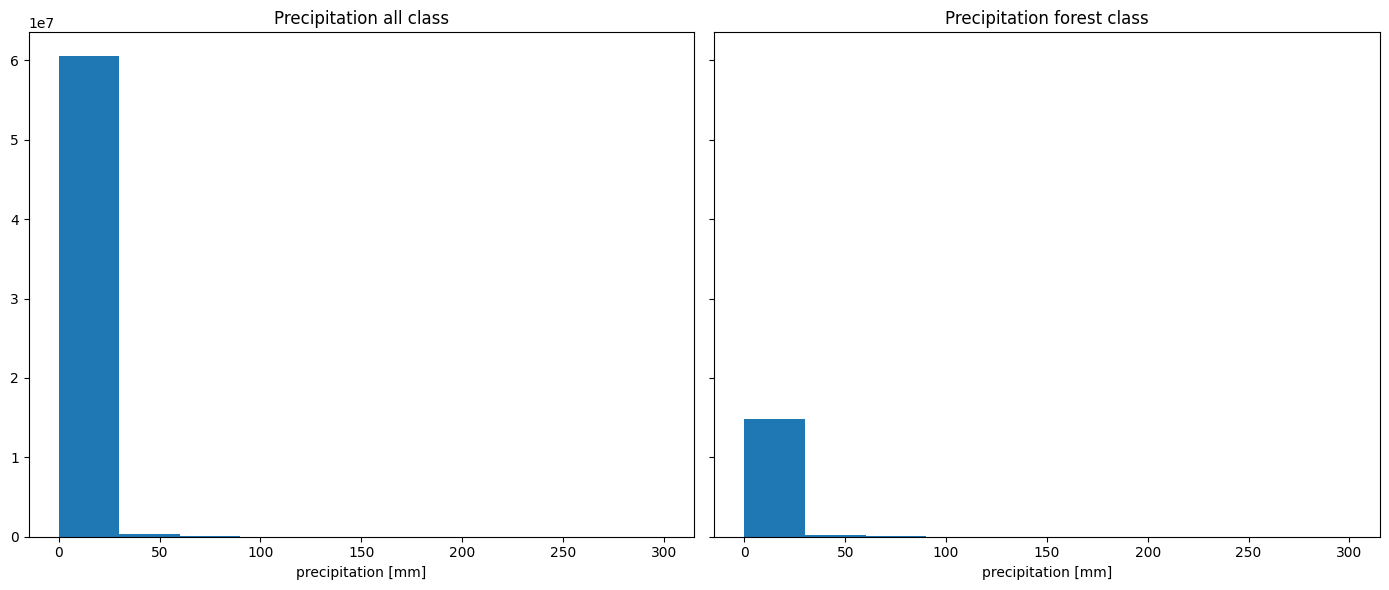

            daily_rain
Date                  
1950-01-01    0.000000
1950-01-02    0.000000
1950-01-03    5.899972
1950-01-04    2.300004
1950-01-05    0.000000
...                ...
2022-05-11   20.099937
2022-05-12    7.199967
2022-05-13   24.799871
2022-05-14    0.000000
2022-05-15    0.000000

[26433 rows x 1 columns]


In [40]:
# NOTE: fill me!
#%% get the precipitation for all grid cells in the forest class (value of 110).

vegetation_forest_class = vegetation_downscaled_xr.vegetation == 110
precipitation_xr_forest_class = precipitation_xr.where(vegetation_forest_class)

## visualization
## plotting the all class rainfall vs. only forest class rainfall
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey = True)
precipitation_xr.precipitation.plot(ax=ax[0])
ax[0].set_title("Precipitation all class")
precipitation_xr_forest_class.precipitation.plot(ax=ax[1])
ax[1].set_title("Precipitation forest class")
plt.tight_layout()
plt.show()

## verify if error, by reruning the above script using, vegetation_xr.vegetation == 110

# remove unwanted dimension
precipitation_xr_forest_class_clean = precipitation_xr_forest_class.drop_vars(["spatial_ref"])

# taking mean precipitation across latitude and longitude for each day
mean_precipitation_xr_forest_class = precipitation_xr_forest_class_clean['precipitation'].mean(dim = ['latitude','longitude'],skipna=True)

# converting xarray to pandas dataframe format
df_rain_historical = mean_precipitation_xr_forest_class.to_dataframe()

# renaming the index of dataframe to "Date" and columns to "daily_rain"
df_rain_historical.index.name = "Date"
df_rain_historical.columns = ["daily_rain"]

# visualize the dataframe
print(df_rain_historical)


In [28]:
assert df_rain_historical.index.name == "Date"

## 3.3 Next steps

The previous task helped you to compute the daily precipitation for one day at the client's locations. We actually have access to 70 years of historical data and that's the object of the next steps. The data from the previous part has been extracted at the client location into a dataframe that you will use from now on

# 4. Pricing

## 4.1 Context

The client is looking to be covered against excess of rain.

The client wishes to receive a payout under the following conditions:
+ Depends on the cumulative rainfall (mm) over the season.
+ Linear payout starting at a deductible of 650 mm and limit of 750 mm with a payout of AUD 500,000.

It means that 
+ If the cumulative rainfall is below 650 mm, the client receives nothing.
+ If the cumulative rainfall is above 750 mm, the client receives the max payout of AUD 500,000 no matter the loss.
+ If the cumulative rainfall is between 650 and 750 mm, the payout is linear, slope of AUD 5,000 per mm. For example, if the cumulative rainfall is 700 mm, the payout would be AUD 250,000.


## 4.2 Data

We have access to the cumulative rainfall (in millimeters-mm) each day since 1950 January 1st using the task before.

## 4.3 Preprocessing

### 4.3.1 Filtering

**Risk period**

The client would like to be covered from the 1st of December of a given year until 1st of March of the following year (**not included**).

**Task**
- Filter the historical dates to keep only the ones in the risk periods. ⚠️ You should not have incomplete seasons. ⚠️
- Remove the rows with the date equal to February 29th.
- Create a `season` column, the value of the season is the year corresponding to the 1st of December. For example, for the given risk period 1st of December 2021 - 1st of March 2022, the season is 2021.

In [43]:
# NOTE: fill me!
"""
Created on Mon Aug 26 15:54:44 2024

@author: harishgunasekaran
"""

# filter by months Jan, Feb, December (risk period)
df_rain_historical = df_rain_historical.loc[df_rain_historical.index.month.isin([1,2,12])]

## check the leap years and 29
print(np.sum((df_rain_historical.index.day==29) & (df_rain_historical.index.month==2)))
# Out[65]: 18

# filter the 29 Feb
df_rain_historical = df_rain_historical.drop(df_rain_historical[(df_rain_historical.index.month==2) & (df_rain_historical.index.day==29)].index)

## check again if the output is zero
print('\n',np.sum((df_rain_historical.index.day==29) & (df_rain_historical.index.month==2)))
# Out[67]: 0

# removing incomplete seasons 
# filter Jan, Feb 1950
df_rain_historical = df_rain_historical.drop(df_rain_historical[(df_rain_historical.index.year==1950) & (df_rain_historical.index.month.isin([1,2]))].index)

# adding a new column, add the corresponding year
df_rain_historical['season'] = df_rain_historical.index.year

# replace values in the 'season' column based on condition and make the 'seasonal' year
df_rain_historical.loc[df_rain_historical.index.month==12, 'season'] = df_rain_historical['season']+1


0

 0


In [44]:
assert list(df_rain_historical.columns) == ["daily_rain", "season"]

### 4.3.2 Regroup by season

**Task**

- Create a new dataframe `df_cum_rain` by regrouping by season and by computing the cumulative rainfall over the risk period.
- Rename the column `daily_rain` by `cum_rain`.

In [48]:
# NOTE: fill me!
#%% 4.3.2 Regroup by season, finding the cumulative rain and renaming the columns
df_cum_rain = df_rain_historical.groupby('season').sum()
df_cum_rain = df_cum_rain.reset_index()
df_cum_rain = df_cum_rain.rename(columns={"daily_rain": "cum_rain"}) 
print(df_cum_rain)

    season    cum_rain
0     1951  682.498901
1     1952  228.799973
2     1953  479.200775
3     1954  612.900330
4     1955  514.200256
..     ...         ...
67    2018  345.799438
68    2019  243.898972
69    2020  243.800156
70    2021  128.799988
71    2022  150.100433

[72 rows x 2 columns]


## 4.4 Compute payouts

Using the current values of `cum_rain`, we will now compute the historical payouts.

**Task**
- Design a function that computes the payouts using the structure defined above.
- Compute historical payouts since 1950 by creating a new dataframe `df_historical_payouts` with column `hist_payouts`. 

The resulting mean value of historical payouts is called **burning cost** and corresponds to the mean payout the client would have received based on the historica data. This is an important metrics in the design of insurance covers.

In [53]:
# NOTE: fill me!

# function that computes the payouts 
def compute_payouts(df1):
    slope = 5000
    df2 = pd.DataFrame()
    df2 = df1.copy()
    df2.loc[df2['cum_rain'] < 650.0 , 'hist_payouts'] = 0
    df2.loc[df2['cum_rain'] > 750.0 , 'hist_payouts'] = 500000
    df2.loc[ (df2['cum_rain'] >= 650.0) & (df2['cum_rain'] <= 750.0) , 'hist_payouts'] = slope * df2['cum_rain'] - 3250000
    df2 = df2.drop('cum_rain', axis=1)
    df2 = df2.drop('season', axis=1)
    return df2

df_historical_payouts =  compute_payouts(df_cum_rain)
burning_cost = np.round(df_historical_payouts['hist_payouts'].mean(),2)
print('burning cost of the client = AUD', burning_cost)


burning cost of the client = AUD 26548.45


## 4.5 Weighting

### 4.5.1 Year type

We actually have access to historical yearly forecasts that states if the year was supposed to be rainy or not. There are 3 predictions:
- neutral
- dry
- rainy

All the information is stored in the dataframe `df_year_type`.

We will use this information to compute a weighted payouts using next year forecast.

In [54]:
year_type_data_path = DATA_PATH / "pricing" / "year_type_historical.csv"

In [56]:
df_year_type = (
    pd.read_csv(year_type_data_path, index_col=0)
    .rename(columns={"Year": "season"})
    .set_index("season")
)
df_year_type.head()

,year_type
season,
1950,rainy
1951,dry
1952,neutral
1953,dry
1954,rainy


**Task**

Do the same computation (historical payouts) for each of the year type (rainy, dry or neutral). Compute the burning cost of each of the year type. What can you observe ?

In [63]:
# NOTE: fill me!

def compute_payouts_year_type(df1):
    df2 = pd.DataFrame()
    df2 = df1.copy()
    df2.loc[df2['year_type'] == 'dry' , 'hist_payouts'] = 0 # no cover
    df2.loc[df2['year_type'] == 'rainy' , 'hist_payouts'] = 500000   # hundred percent cover
    df2.loc[df2['year_type'] == 'neutral' , 'hist_payouts'] = 250000 # fifty percent cover
    df2 = df2.drop('year_type', axis=1)
    return df2

df_historical_payouts_year_type =  compute_payouts_year_type(df_year_type)
burning_cost_year_type = np.round(df_historical_payouts_year_type['hist_payouts'].mean(),2)
print('burning cost of the client based on year type = AUD', burning_cost_year_type)
print("\n I made two oberservations: " )
print("\n 1) definition of neutral year is ambigous, not clear how much payout to be covered during computation")
print("\n 2) on assuming a flat fifty-percent cover, the mean payout (i.e., buring cost) has become a huge cost")

burning cost of the client based on year type = AUD 253472.22

 I made two oberservations: 

 1) definition of neutral year is ambigous, not clear how much payout to be covered during computation

 2) on assuming a flat fifty-percent cover, the mean payout (i.e., buring cost) has become a huge cost


### 4.5.2 Next year forecast

The forecast for next year is given in terms of probability for each of the year types:

In [59]:
next_year_forecast = {"dry": 0.58, "neutral": 0.37, "rainy": 0.05}

**Task**

How would you leverage on these forecasts to better estimate the risk and adjust the burning cost ? 

In [64]:
# NOTE: fill me!
# we can use this info to give an estimate of hist_payouts 
# hist_payout weighted by probability of next year's forecast 

def compute_payouts_by_forecast(df1):
    df2 = pd.DataFrame()
    df2 = df1.copy()
    df2.loc[df2['year_type'].shift(-1) == 'dry' , 'hist_payouts'] = 0 * next_year_forecast["dry"] # no cover
    df2.loc[df2['year_type'].shift(-1) == 'rainy' , 'hist_payouts'] = 500000 * next_year_forecast["rainy"]   # hundred percent cover
    df2.loc[df2['year_type'].shift(-1) == 'neutral' , 'hist_payouts'] = 250000 * next_year_forecast["neutral"] # fifty percent cover
    df2 = df2.drop('year_type', axis=1)
    return df2

df_historical_payouts_forecast =  compute_payouts_by_forecast(df_year_type)
burning_cost_forecast = np.round(df_historical_payouts_forecast['hist_payouts'].mean(),2)

print('\n burning cost of the client based on next year forecast = AUD', burning_cost_forecast)
print('\n by forecasting and estimating the risk, the mean payout (i.e., buring cost) has significantly lowered by 86.62%')




 burning cost of the client based on next year forecast = AUD 33908.45

 by forecasting and estimating the risk, the mean payout (i.e., buring cost) has significantly lowered by 86.62%


---
# END OF SCRIPT